# Confidence Intervals

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.

The t-multiplier is calculated based on the degrees of freedom and desired confidence level.  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$



In [1]:
import pandas as pd
import numpy as np
#pd.options.plotting.backend = "plotly"

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140

In [3]:
df = pd.read_csv("../data/credit-g_csv.csv")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


# Proportion

<AxesSubplot:>

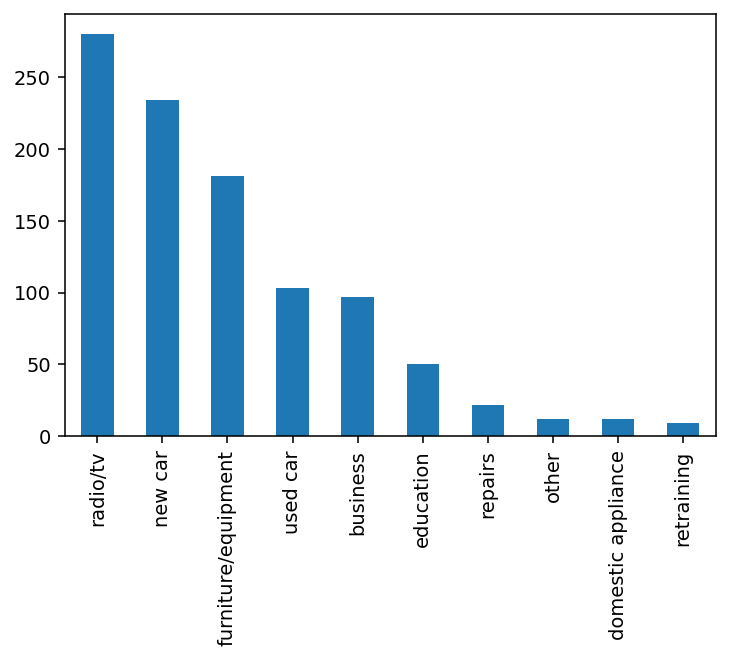

In [4]:
df["purpose"].value_counts().plot(kind="bar")

In [5]:
prop_radio_tv = df["purpose"].value_counts()['radio/tv']/df.shape[0]
prop_radio_tv

0.28

In [6]:
tstar = 1.96

n = len(df)

se = np.sqrt((prop_radio_tv * (1 - prop_radio_tv))/n)
se

0.014198591479439079

In [7]:
lcb = prop_radio_tv - tstar * se
ucb = prop_radio_tv + tstar * se
(lcb, ucb)

(0.2521707607002994, 0.30782923929970063)

In [8]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * prop_radio_tv, n)

(0.25217127206910217, 0.3078287279308979)

# Mean

<AxesSubplot:ylabel='Frequency'>

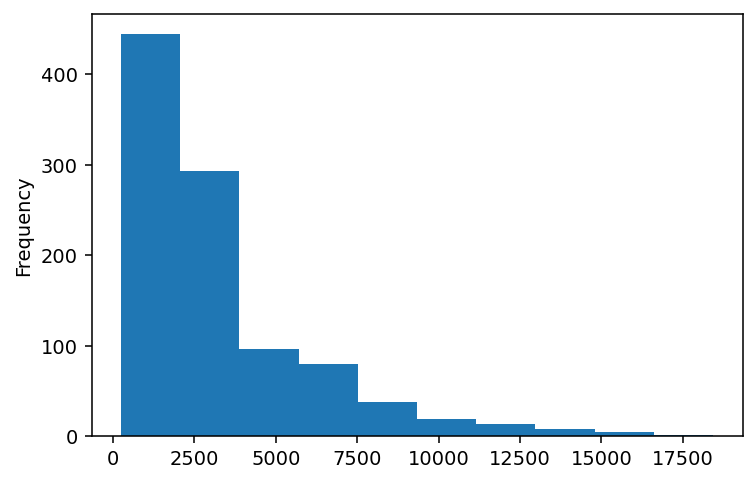

In [9]:
df["credit_amount"].plot(kind="hist")

In [10]:
mean = df["credit_amount"].mean()
sd = df["credit_amount"].std()
n = len(df)

n

1000

In [11]:
tstar = 2.064

se = sd/np.sqrt(n)

se

89.26277763383183

In [12]:
lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

(3087.019626963771, 3455.4963730362288)

# [Ref](https://www.coursera.org/learn/inferential-statistical-analysis-python/home/welcome)